In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [69]:
df= pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [70]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [71]:
df.shape

(200, 5)

In [72]:
X = df[["TV"]]
y = df[["Sales"]]

# Model

reg_model = LinearRegression().fit(X, y)

# constant (b - bias)
b = reg_model.intercept_[0]

# coefficient of TV (M)
M = reg_model.coef_[0][0]

print("Linear regression parameters at : b = {0}, M = {1}".format(b, M))

Linear regression parameters at : b = 7.032593549127694, M = 0.04753664043301976


In [73]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150


14.163089614080658

In [74]:
new_data = [150]

new_data = pd.DataFrame(new_data,columns=['TV'])


reg_model.predict(new_data)

array([[14.16308961]])

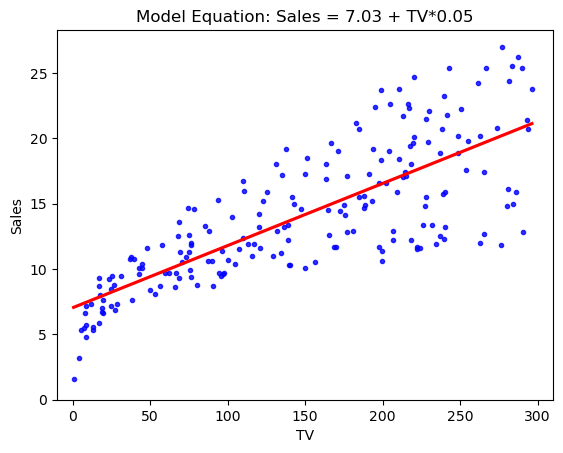

In [75]:
# Visualization of the Model
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [76]:
X = df[['TV','Radio','Newspaper']]
y = df[["Sales"]]

In [77]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [78]:
X_train

,TV,Radio,Newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [79]:
X_test


,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [80]:
y_train

,Sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5
...,...
133,19.6
137,20.8
72,8.8
140,10.9


In [81]:
y_test

,Sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


In [82]:
#Creating model
model = LinearRegression()

In [63]:
#Fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([[21.73577184],
       [16.45693776],
       [ 7.65993185],
       [17.89202679],
       [18.67730671],
       [23.86271904],
       [16.33623628],
       [13.45649226],
       [ 9.177296  ],
       [17.36056228],
       [14.4677995 ],
       [ 9.85697601],
       [17.26057027],
       [16.71866935],
       [15.09530285],
       [15.58923732],
       [12.45188167],
       [17.27925151],
       [11.0944114 ],
       [18.06889853],
       [ 9.33433055],
       [12.91345761],
       [ 8.7842804 ],
       [10.46670654],
       [11.40303174],
       [15.03104665],
       [ 9.78479388],
       [19.46028647],
       [18.22954934],
       [17.1958903 ],
       [21.60304218],
       [14.71901407],
       [16.29205532],
       [12.36432281],
       [19.98831261],
       [15.37556411],
       [13.96678297],
       [10.06809496],
       [20.97197274],
       [ 7.45877832]])

In [66]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 1.9918855518287901


In [67]:
print('R-squared:', r2_score(y_test, y_pred))

R-squared: 0.8927605914615384
